In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
with open(r"D:\Machine Learning Sentex\datasets\nba_2013.csv", 'r') as csvfile: 
    
    nba = pd.read_csv(csvfile) 

In [27]:
nba.head()


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [28]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [29]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [30]:
# Dropping Categorical Columns

df = nba

df.drop(['player','pos','bref_team_id','season'], axis = 1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         481 non-null    int64  
 1   g           481 non-null    int64  
 2   gs          481 non-null    int64  
 3   mp          481 non-null    int64  
 4   fg          481 non-null    int64  
 5   fga         481 non-null    int64  
 6   fg.         479 non-null    float64
 7   x3p         481 non-null    int64  
 8   x3pa        481 non-null    int64  
 9   x3p.        414 non-null    float64
 10  x2p         481 non-null    int64  
 11  x2pa        481 non-null    int64  
 12  x2p.        478 non-null    float64
 13  efg.        479 non-null    float64
 14  ft          481 non-null    int64  
 15  fta         481 non-null    int64  
 16  ft.         461 non-null    float64
 17  orb         481 non-null    int64  
 18  drb         481 non-null    int64  
 19  trb         481 non-null    i

In [34]:
df.shape

(481, 27)

In [35]:
# Checking Null Values

df.isnull().sum()

age            0
g              0
gs             0
mp             0
fg             0
fga            0
fg.            2
x3p            0
x3pa           0
x3p.          67
x2p            0
x2pa           0
x2p.           3
efg.           2
ft             0
fta            0
ft.           20
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pf             0
pts            0
season_end     0
dtype: int64

In [36]:
# Filling the missing NaN values with Mean() and ffill

df['x3p.'].fillna((df['x3p.'].mean()), inplace = True)
df['fg.'].ffill(inplace = True)
df['ft.'].fillna((df['ft.'].mean()), inplace = True)
df['x2p.'].ffill(inplace = True)
df['efg.'].ffill(inplace = True)

In [37]:
# Passed values for features(X) and target(y)

y = df['pts']
X = df.drop('pts', axis = 1)

In [8]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
# Scaling with MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
# Created separate DataFrame for Scaled feature and Target

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [40]:
# Calculating MSE

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


In [41]:
# Selection of value for 'K' 

rmse_val = []

for i in range(20):
    i = i+1
    model = neighbors.KNeighborsRegressor(n_neighbors=i)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    
    rmse_val.append(error)
    print('RMSE value for K= :',i," is :",error)
    

RMSE value for K= : 1  is : 153.59094800913505
RMSE value for K= : 2  is : 126.51404447046922
RMSE value for K= : 3  is : 116.26411008999793
RMSE value for K= : 4  is : 108.94419442999246
RMSE value for K= : 5  is : 103.4932121712204
RMSE value for K= : 6  is : 100.45302747040205
RMSE value for K= : 7  is : 99.53337506376135
RMSE value for K= : 8  is : 99.57112072230859
RMSE value for K= : 9  is : 101.95621937071577
RMSE value for K= : 10  is : 102.43068135455617
RMSE value for K= : 11  is : 103.14428853612426
RMSE value for K= : 12  is : 103.06469832212137
RMSE value for K= : 13  is : 101.90007347639647
RMSE value for K= : 14  is : 104.80339641476498
RMSE value for K= : 15  is : 105.23623226995291
RMSE value for K= : 16  is : 105.25367652682634
RMSE value for K= : 17  is : 107.12105573727987
RMSE value for K= : 18  is : 108.25101686447302
RMSE value for K= : 19  is : 110.09973517647481
RMSE value for K= : 20  is : 109.78537949893028


<AxesSubplot:>

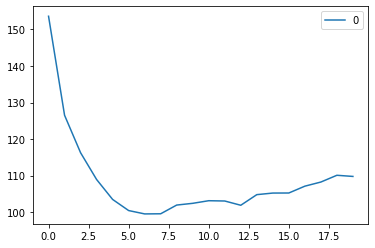

In [17]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [43]:
# Cross_val_score for Accuracy measurment

accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X,y, cv = 5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

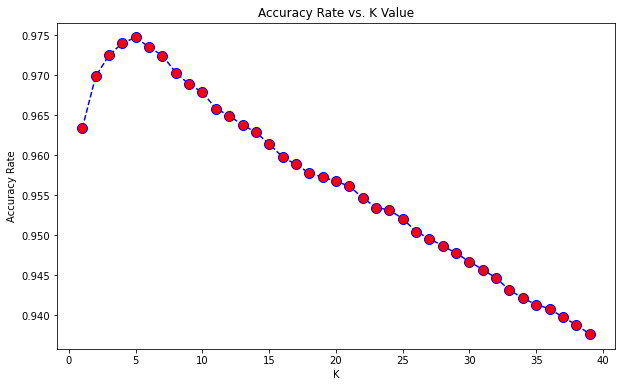

In [45]:
# Graphical Representation for Value of 'K'

plt.figure(figsize=(10,6))

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

With all the visualizations and Calculation . The best value of "K" is '7' and Accuracy Score is around "97%"